# MVPA MEG Tutorial (Python)

This tutorial accompanies the preprint titled "Multivariate pattern analysis for MEG: a comprehensive comparison of dissimilarity measures", which is available at [placeholder](http://doi.org/).

In [9]:
import pickle
import os
import sys

import numpy as np

np.random.seed(10)

preload_RDM = True

root = ''

# Load data for each session
sessions = [
    dict(
        data=pickle.load(open(os.path.join(root, 'data01_sess1_bs10.pkl'), 'rb')),
        # data has shape n_trials x n_sensors x n_timepoints
        labels=pickle.load(open(os.path.join(root, 'labels01_sess1.pkl'), 'rb'))
        # labels has shape 1 x n_trials (i.e., one condition label [object category] per trial)
    ),
    dict(
        data=pickle.load(open(os.path.join(root, 'data01_sess2_bs10.pkl'), 'rb')),
        labels=pickle.load(open(os.path.join(root, 'labels01_sess2.pkl'), 'rb'))
    )
]

# Parameters
n_perm = 20
n_pseudo = 5
n_conditions = len(np.unique(sessions[0]['labels']))
n_sensors = sessions[0]['data'].shape[1]
n_time = sessions[0]['data'].shape[2]
n_sessions = len(sessions)


# Choose classifier
from sklearn.svm import SVC
clf = SVC(kernel='linear')
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# clf = LinearDiscriminantAnalysis()
# from sklearn.naive_bayes import GaussianNB
# clf = GaussianNB()
# from weird import WeiRD
# clf = WeiRD()

# Choose data partitioning scheme
from cv import ShuffleBinLeaveOneOut
CV = ShuffleBinLeaveOneOut


if preload_RDM:
    # RDM = pickle.load(open(os.path.join(root, 'RDM.pkl'), 'rb'))
    RDM = pickle.load(open(os.path.join(root, 'RDM.pkl'), 'rb'))

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
RDM.shape

(2, 10, 10, 130)

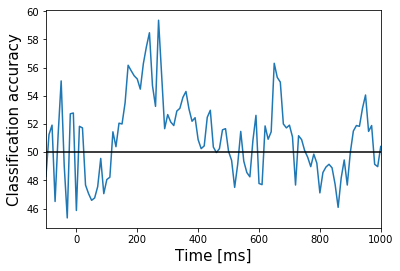

In [17]:
plt.plot(np.arange(-100, 1200, 10), 100*np.nanmean(RDM, axis=(0, 1, 2))+50)
plt.plot([-100, 1000], [50, 50], 'k-')
plt.xlim((-100, 1000))
plt.xlabel('Time [ms]', fontsize=15)
plt.ylabel('Classification accuracy', fontsize=15)

Test **zwei**